# The T5-Base (Text-to-Text Transfer Transformer) model 

The T5 (Text-to-Text Transfer Transformer) model is a large-scale transformer-based language model was developed by a team of researchers from Google, led by Colin Raffel, Noam Shazeer, Adam Roberts, Katherine Lee, Sharan Narang, Michael Matena, Yanqi Zhou, Wei Li, and Peter J. Liu. It is a unified model that can perform a wide range of natural language processing tasks, including text classification, question answering, machine translation, summarization, and more. 

The team trained the T5-base model on a massive amount of data using a self-supervised learning approach, allowing it to learn to perform a wide range of natural language processing tasks. The T5 model was first introduced in a research paper titled "Exploring the Limits of Transfer Learning with a Unified Text-to-Text Transformer," which was published in the Proceedings of the 37th International Conference on Machine Learning in 2020.

The T5 model is trained in a text-to-text fashion, where it is trained to map an input text to a corresponding output text. This enables the model to perform various natural language processing tasks by simply fine-tuning the pre-trained model on task-specific data.

The T5 model architecture consists of a stack of transformer encoder and decoder layers, which allows the model to capture complex language patterns and generate high-quality text outputs. The T5 model also uses a pre-processing step to convert the input and output texts into a standardized format, making it easy to apply the model to different NLP tasks.

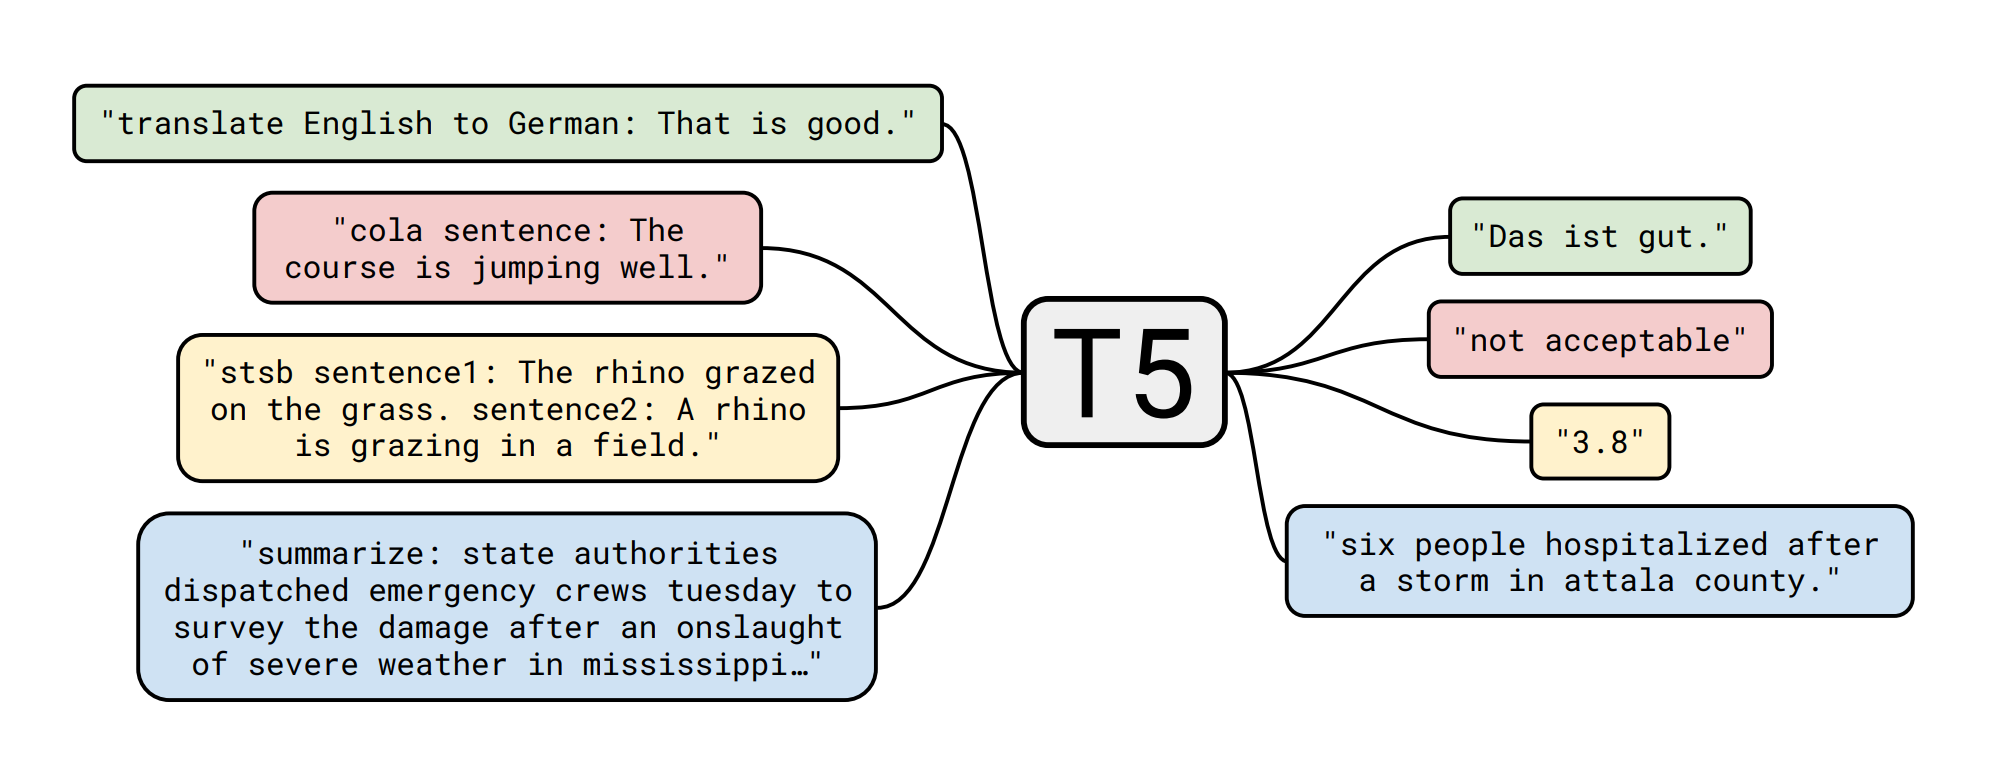

Training Procedure
The model developers write:

"In this paper, we explore the landscape of transfer learning techniques for NLP by introducing a unified framework that converts every language problem into a text-to-text format. Our systematic study compares pre-training objectives, architectures, unlabeled datasets, transfer approaches, and other factors on dozens of language understanding tasks." 

The framework introduced, the T5 framework, involves a training procedure that brings together the approaches studied in the paper. 

# Data Input for T5 Base

it is possible to use XLSX (Excel) format as input data for the T5-base model for translation tasks, but you would need to extract the data from the XLSX file and format it in a way that is suitable for the T5-base model's input requirements.

Here's an example of how you could format your XLSX data for translation using the T5-base model:
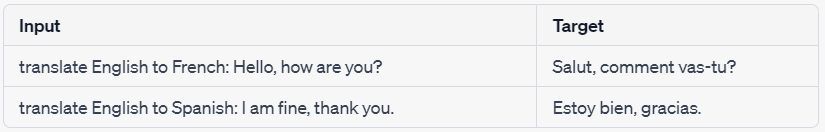

In this example, *the Input* column contains the task and input text, and *the Target* column contains the expected output of the translation task. Each row represents a separate translation task.

To use this XLSX data with the T5-base model, you would need to read in the data and split each row into its *Input* and *Target* components. Then, you could feed each pair of input and target texts into the T5-base model as separate instances, just as you would with the CSV or JSON input formats. You would also need to tokenize the input data into appropriate input format depending on the input representation used in the model.

Tokenizing the input data involves breaking down the text into its constituent parts, such as words or subwords, and converting them into numerical values that can be processed by the T5-base model. The specific method for tokenizing the input data depends on the type of input representation used in the model.

The T5-base model uses a variant of the Byte Pair Encoding (BPE) algorithm for its input representation, which involves breaking down the text into variable-length subword units. You can use the Hugging Face Transformers library, which provides a convenient Python interface for tokenizing and encoding text data for use with the T5-base model.

Here's an example of how you could use the Hugging Face Transformers library to tokenize and encode input data for use with the T5-base model:

-----------------------------------------------------------------------------------------------------------------------------
from transformers import T5Tokenizer

tokenizer = T5Tokenizer.from_pretrained('t5-base')

#### Example input and target texts
input_text = "translate English to French: Hello, how are you?"
target_text = "Salut, comment vas-tu?"

#### Tokenize and encode the input and target texts
inputs = tokenizer.encode(input_text, return_tensors='pt')
targets = tokenizer.encode(target_text, return_tensors='pt')

#### Print the tokenized input and target texts
print(inputs)
print(targets)

-----------------------------------------------------------------------------------------------------------------------------

In this example, we first create an instance of the T5 tokenizer from the Hugging Face Transformers library. We then provide example input and target texts and use the tokenizer to tokenize and *encode* them into numerical representations using PyTorch tensors.

The encode method of the T5 tokenizer tokenizes the text and encodes it as a sequence of integer tokens that can be used as input to the T5-base model. The *return_tensors* argument specifies that we want the output to be returned as PyTorch tensors.

Note that *the encode method* also applies several other preprocessing steps, such as adding special tokens to the input and target texts to denote the beginning and end of the sequence, and padding the sequences to a fixed length if necessary. These preprocessing steps are necessary to ensure that the input data is in the correct format for use with the T5-base model.

In [5]:
import torch

DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [6]:
from torchtext.models import T5Transform

padding_idx = 0
eos_idx = 1
max_seq_len = 512
t5_sp_model_path = "https://download.pytorch.org/models/text/t5_tokenizer_base.model"

transform = T5Transform(
    sp_model_path=t5_sp_model_path,
    max_seq_len=max_seq_len,
    eos_idx=eos_idx,
    padding_idx=padding_idx,
)

In [7]:
from torchtext.models import T5_BASE_GENERATION
transform = T5_BASE_GENERATION.transform()

In [8]:
from torchtext.models import T5_BASE_GENERATION


t5_base = T5_BASE_GENERATION
transform = t5_base.transform()
model = t5_base.get_model()
model.eval()
model.to(DEVICE)

T5Model(
  (token_embeddings): Embedding(32128, 768, padding_idx=0)
  (encoder): T5Encoder(
    (token_embeddings): Embedding(32128, 768, padding_idx=0)
    (layers): ModuleList(
      (0): T5Layer(
        (self_attn): T5MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=False)
          (relative_attention_bias): Embedding(32, 12)
        )
        (linear1): Linear(in_features=768, out_features=3072, bias=False)
        (linear2): Linear(in_features=3072, out_features=768, bias=False)
        (norm1): T5LayerNorm()
        (norm2): T5LayerNorm()
        (dropout1): Dropout(p=0.0, inplace=False)
        (dropout2): Dropout(p=0.0, inplace=False)
        (dropout3): Dropout(p=0.0, inplace=False)
      )
      (1-11): 11 x T5Layer(
        (self_attn): T5MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=False)
        )
        (linear1): Linear(in_features=768,

In [9]:
from torchtext.prototype.generate import GenerationUtils

sequence_generator = GenerationUtils(model)

In [10]:
from functools import partial

from torch.utils.data import DataLoader
from torchtext.datasets import CNNDM

cnndm_batch_size = 5
cnndm_datapipe = CNNDM(split="test")
task = "summarize"


def apply_prefix(task, x):
    return f"{task}: " + x[0], x[1]


cnndm_datapipe = cnndm_datapipe.map(partial(apply_prefix, task))
cnndm_datapipe = cnndm_datapipe.batch(cnndm_batch_size)
cnndm_datapipe = cnndm_datapipe.rows2columnar(["article", "abstract"])
cnndm_dataloader = DataLoader(cnndm_datapipe, batch_size=None)

In [11]:
def batch_prefix(task, x):
 return {
     "article": [f'{task}: ' + y for y in x["article"]],
     "abstract": x["abstract"]
 }

cnndm_batch_size = 5
cnndm_datapipe = CNNDM(split="test")
task = 'summarize'

cnndm_datapipe = cnndm_datapipe.batch(cnndm_batch_size).rows2columnar(["article", "abstract"])
cnndm_datapipe = cnndm_datapipe.map(partial(batch_prefix, task))
cnndm_dataloader = DataLoader(cnndm_datapipe, batch_size=None)

In [12]:
from torchtext.datasets import IMDB

imdb_batch_size = 3
imdb_datapipe = IMDB(split="test")
task = "sst2 sentence"
labels = {"neg": "negative", "pos": "positive"}


def process_labels(labels, x):
    return x[1], labels[x[0]]


imdb_datapipe = imdb_datapipe.map(partial(process_labels, labels))
imdb_datapipe = imdb_datapipe.map(partial(apply_prefix, task))
imdb_datapipe = imdb_datapipe.batch(imdb_batch_size)
imdb_datapipe = imdb_datapipe.rows2columnar(["text", "label"])
imdb_dataloader = DataLoader(imdb_datapipe, batch_size=None)

In [13]:
from torch.utils.data import DataLoader

In [14]:
from torchtext.datasets import Multi30k
from functools import partial


multi_batch_size = 5
language_pair = ("en", "de")
multi_datapipe = Multi30k(split="test", language_pair=language_pair)
task = "translate English to German"

# from my_module import apply_prefix

# multi_datapipe = multi_datapipe.map(lambda x: {"english": apply_prefix(x["english"], task), "german": x["german"]})

multi_datapipe = multi_datapipe.map(partial(apply_prefix, task))
multi_datapipe = multi_datapipe.batch(multi_batch_size)
multi_datapipe = multi_datapipe.rows2columnar(["english", "german"])
multi_dataloader = DataLoader(multi_datapipe, batch_size=None)

In [15]:
batch = next(iter(multi_dataloader))
input_text = batch["english"]
target = batch["german"]
beam_size = 4

model_input = transform(input_text)
model_output = sequence_generator.generate(model_input, eos_idx=eos_idx)
output_text = transform.decode(model_output.tolist())

for i in range(multi_batch_size):
    print(f"Example {i+1}:\n")
    print(f"input_text: {input_text[i]}\n")
    print(f"prediction: {output_text[i]}\n")
    print(f"target: {target[i]}\n\n")

`max_length` was not specified. Defaulting to 256 tokens.


Example 1:

input_text: translate English to German: A man in an orange hat starring at something.

prediction: Ein Mann in einem orangen Hut, der an etwas schaut.

target: Ein Mann mit einem orangefarbenen Hut, der etwas anstarrt.


Example 2:

input_text: translate English to German: A Boston Terrier is running on lush green grass in front of a white fence.

prediction: Ein Boston Terrier läuft auf üppigem grünem Gras vor einem weißen Zaun.

target: Ein Boston Terrier läuft über saftig-grünes Gras vor einem weißen Zaun.


Example 3:

input_text: translate English to German: A girl in karate uniform breaking a stick with a front kick.

prediction: Ein Mädchen in Karate-Uniform bricht einen Stöck mit einem Frontkick.

target: Ein Mädchen in einem Karateanzug bricht einen Stock mit einem Tritt.


Example 4:

input_text: translate English to German: Five people wearing winter jackets and helmets stand in the snow, with snowmobiles in the background.

prediction: Fünf Menschen mit Winterj

In [16]:
next(iter(multi_dataloader))

C:\Users\ZERIFE\anaconda3\lib\site-packages\torch\utils\data\datapipes\iter\combining.py:297: UserWarning: Some child DataPipes are not exhausted when __iter__ is called. We are resetting the buffer and each child DataPipe will read from the start again.
  warnings.warn("Some child DataPipes are not exhausted when __iter__ is called. We are resetting "


{'english': ['translate English to German: A man in an orange hat starring at something.',
  'translate English to German: A Boston Terrier is running on lush green grass in front of a white fence.',
  'translate English to German: A girl in karate uniform breaking a stick with a front kick.',
  'translate English to German: Five people wearing winter jackets and helmets stand in the snow, with snowmobiles in the background.',
  'translate English to German: People are fixing the roof of a house.'],
 'german': ['Ein Mann mit einem orangefarbenen Hut, der etwas anstarrt.',
  'Ein Boston Terrier läuft über saftig-grünes Gras vor einem weißen Zaun.',
  'Ein Mädchen in einem Karateanzug bricht einen Stock mit einem Tritt.',
  'Fünf Leute in Winterjacken und mit Helmen stehen im Schnee mit Schneemobilen im Hintergrund.',
  'Leute Reparieren das Dach eines Hauses.']}

# The difference between Text-to-text and text generation

Text-to-text and text generation are two related but distinct concepts in natural language processing.

Text-to-text refers to a paradigm where a model is trained to transform one piece of text into another. The goal is to learn a general mapping from input text to output text that can be used to perform various natural language processing tasks. For example, the T5 (Text-to-Text Transfer Transformer) model is trained in a text-to-text fashion, where it is trained to map an input text to a corresponding output text, such as translating a sentence from one language to another, summarizing a document, or answering a question based on a given passage.

On the other hand, text generation refers to the task of generating new text based on some input or prompt. In this case, the model is not constrained by any particular output text, and it is free to generate any text that it deems appropriate based on the input. For example, a language model can be trained to generate coherent and fluent sentences or paragraphs based on a given prompt.

In summary, the main difference between text-to-text and text generation is that text-to-text involves transforming an input text into an output text, while text generation involves generating new text based on a given prompt. Text-to-text models can be used for a wide range of natural language processing tasks, while text generation is typically used for creative writing, dialogue systems, and other applications that require the generation of original and creative text

# Can we use Azerbaijani language with T5 Base?

Azerbaijani language can be used with the T5 Base model. However, you would need to fine-tune the model on Azerbaijani language data in order to get good results for Azerbaijani language tasks.

Fine-tuning involves retraining the T5 Base model on a new dataset, in this case Azerbaijani language data. This allows the model to learn the patterns and structures of Azerbaijani language, and to adapt to the specific characteristics of the language.

To fine-tune the T5 Base model on Azerbaijani language data, you would need a sufficiently large dataset of Azerbaijani language text, along with corresponding input-output pairs for the specific task you are interested in (e.g., translation, summarization, etc.). You would then use this data to train the T5 Base model using a technique called transfer learning, which involves initializing the model with pre-trained weights and then fine-tuning it on the new data.

There are several open-source machine learning libraries and frameworks that provide tools for fine-tuning T5 Base models, such as the Hugging Face Transformers library in Python. You can use these tools to fine-tune the T5 Base model on Azerbaijani language data for your specific task.







# Translater libraries

The Hugging Face Transformers library is a popular open-source machine learning library that provides tools for fine-tuning T5 Base models, as well as other transformer-based models, in Python. It provides a high-level API for loading and fine-tuning pre-trained transformer models, including the T5 Base model, on various NLP tasks.

In addition to the Hugging Face Transformers library, there are other open-source machine learning libraries and frameworks that provide tools for fine-tuning T5 Base models. Some of these libraries include:

-- PyTorch: PyTorch is a popular deep learning framework that provides tools for building and training neural networks, including transformer-based models like T5 Base. PyTorch also provides pre-trained T5 Base models that can be fine-tuned on new datasets.

-- TensorFlow: TensorFlow is another popular deep learning framework that provides tools for building and training neural networks, including transformer-based models like T5 Base. TensorFlow also provides pre-trained T5 Base models that can be fine-tuned on new datasets.

-- MXNet: MXNet is an open-source deep learning framework that provides tools for building and training neural networks, including transformer-based models like T5 Base. MXNet also provides pre-trained T5 Base models that can be fine-tuned on new datasets.

All of these libraries provide similar tools for fine-tuning T5 Base models, including data loading and preprocessing tools, model initialization and fine-tuning functions, and evaluation metrics. The choice of library will depend on your personal preferences, the specific requirements of your task, and the level of support and community resources available for each library.

------------------------------------------------------------------------------------------------------------------------------

Here are some PyTorch libraries that can be used for translation tasks with the T5 Base model:

-- 1.PyTorch Lightning: PyTorch Lightning is a lightweight PyTorch wrapper that provides a high-level API for building and training deep learning models, including transformer-based models like T5. PyTorch Lightning also provides tools for data loading and preprocessing, model checkpointing, and distributed training.

-- 2.Fairseq: Fairseq is an open-source sequence modeling toolkit that provides tools for building and training sequence-to-sequence models, including transformer-based models like T5. Fairseq includes pre-trained T5 models that can be fine-tuned on new datasets, as well as tools for data loading and preprocessing, model evaluation, and inference.

-- 3.PyTorch Translate: PyTorch Translate is a PyTorch-based library for building and training neural machine translation models. PyTorch Translate includes pre-trained T5 models that can be fine-tuned on new datasets, as well as tools for data loading and preprocessing, model evaluation, and inference.

All of these libraries provide similar tools for fine-tuning T5 Base models on translation tasks, including data loading and preprocessing tools, model initialization and fine-tuning functions, and evaluation metrics. The choice of library will depend on your personal preferences, the specific requirements of your task, and the level of support and community resources available for each library.